# Dataset Visualization

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/ModelTrainingLog.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mode       29910 non-null  object 
 1   step       29910 non-null  int64  
 2   epoch      29910 non-null  int64  
 3   loss       29910 non-null  float64
 4   accuracy   29910 non-null  float64
 5   f1         29910 non-null  float64
 6   precision  29910 non-null  float64
 7   recall     29910 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.8+ MB


In [4]:
df.head()

,mode,step,epoch,loss,accuracy,f1,precision,recall
0,train,0,0,1.124521,0.242188,0.223854,0.413375,0.353726
1,train,1,0,0.992461,0.593750,0.249589,0.199475,0.333333
2,train,2,0,0.910455,0.585938,0.246305,0.195312,0.333333
3,train,3,0,0.845725,0.625000,0.256410,0.208333,0.333333
4,train,4,0,0.847026,0.609375,0.252427,0.203125,0.333333


In [5]:
df.pivot_table(
    index=["mode", "epoch"], values=["loss", "accuracy", "f1"], aggfunc="mean"
).reset_index()

,mode,epoch,accuracy,f1,loss
0,eval,0,0.825644,0.848602,0.385740
1,eval,1,0.864019,0.877643,0.315315
2,eval,2,0.868103,0.886498,0.317006
3,eval,3,0.870263,0.888246,0.326416
4,eval,4,0.868591,0.886511,0.377289
5,train,0,0.674245,0.424022,0.706720
6,train,1,0.859183,0.875438,0.322103
7,train,2,0.886319,0.903846,0.266642
8,train,3,0.911851,0.927347,0.214166
9,train,4,0.933891,0.946254,0.167141


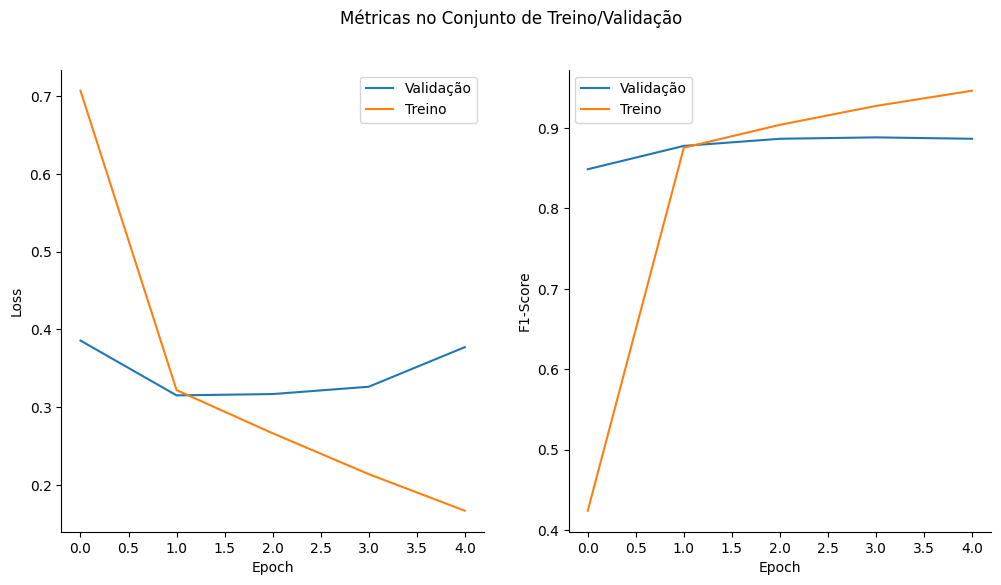

In [6]:
from src.build_visualizations import metrics_from_training

metrics_from_training(df)

In [12]:
df.pivot_table(
    index=["mode", "epoch"], values=["loss", "accuracy", "f1"], aggfunc="mean"
).reset_index()[["f1", "accuracy"]].max()

f1          0.946254
accuracy    0.933891
dtype: float64

---

In [13]:
df = pd.read_csv("../data/raw/ModelTestLog.csv")

In [14]:
df.head()

,mode,step,epoch,loss,accuracy,f1,precision,recall
0,eval,0,0,0.429975,0.867188,0.860099,0.847222,0.876287
1,eval,1,0,0.299695,0.867188,0.888844,0.899031,0.881593
2,eval,2,0,0.308811,0.835938,0.852690,0.841667,0.868616
3,eval,3,0,0.258147,0.906250,0.925711,0.923496,0.928354
4,eval,4,0,0.416072,0.835938,0.867671,0.866300,0.869143


In [16]:
df[["loss", "accuracy", "f1", "precision", "recall"]].mean()

loss         0.324625
accuracy     0.870465
f1           0.889072
precision    0.893903
recall       0.887908
dtype: float64